In [93]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import spacy


# Load the dataset
df = pd.read_csv('sentiment_data.csv')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241145 entries, 0 to 241144
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  241145 non-null  int64 
 1   Comment     240928 non-null  object
 2   Sentiment   241145 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.5+ MB


In [95]:
df.sample(15)

,Unnamed: 0,Comment,Sentiment
136027,136805,bosses massive inferiority complex modi baskin...,0
128723,129501,modi air quotes michael scott declaring bankru...,2
130498,131276,rahul gandhi wishes modi happy world theatre d...,2
205954,206732,modis india congress govt forcesnia register f...,0
17866,17910,honest man actually pretty good nice friendly ...,2
83303,84081,soul says rahul unfit vote modi congress propa...,2
219001,219779,modi bhagwat swmin missing amit shah files nom...,0
44717,45494,bummer phone gets disconnected weekend birthda...,0
134706,135484,happened modi accountable attack,1
126672,127450,project years old proud scientists achievement...,2


# 0 for Negative , 1 for Neutral , 2 for Positive

# Cleaning

In [96]:
df.isnull().sum()


Unnamed: 0      0
Comment       217
Sentiment       0
dtype: int64

In [97]:
df.dropna(subset=['Comment'], inplace=True)
df.drop(columns= ['Unnamed: 0'], inplace=True)


In [98]:
nlp = spacy.load("en_core_web_sm")

def clean_and_tokenize(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+', " ", text)     
    text = re.sub(r'@\w+|#\w+', " ", text)          
    text = re.sub(r'\d+', " ", text)               
    text = re.sub(r"[^a-z\s]", " ", text)       
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  

    # tokenization + lemmatization + stopword removal + punct removal
    doc = nlp(text)
    tokens = [          # returnet as a list
        token.lemma_ 
        for token in doc 
        if not token.is_stop and not token.is_punct and not token.is_space
    ]

    return tokens

df['tokens'] = df['Comment'].apply(clean_and_tokenize) # apply the function for each row in the comment column

KeyboardInterrupt: 

In [ ]:
df.sample(20)

,Comment,Sentiment,tokens
161746,crush modi seems dont admit jha would matter c...,1,"[crush, modi, not, admit, jha, matter, congressi]"
213951,andhra pradeshundi constituency bjp mla contes...,2,"[andhra, pradeshundi, constituency, bjp, mla, ..."
128823,modi steals workcoming years advancements some...,2,"[modi, steal, workcome, year, advancement, ask..."
230412,negative person seen called educated mental tw...,2,"[negative, person, see, call, educate, mental,..."
61189,free app limited good one,1,"[free, app, limit, good]"
113952,ashraf ghani afghanistan another face like nar...,1,"[ashraf, ghani, afghanistan, face, like, naren..."
74658,went touching app day week span months would b...,1,"[go, touching, app, day, week, span, month, we..."
5807,offered position kept receiving rejection wasn...,2,"[offer, position, keep, receive, rejection, wa..."
213,guy wonderful like sense humor doctor dr wrong...,2,"[guy, wonderful, like, sense, humor, doctor, d..."
165500,hatred modi politicians lobbyists liberals med...,2,"[hatred, modi, politician, lobbyist, liberal, ..."


Text(0.5, 1.0, 'Distribution of Sentiment Classes')

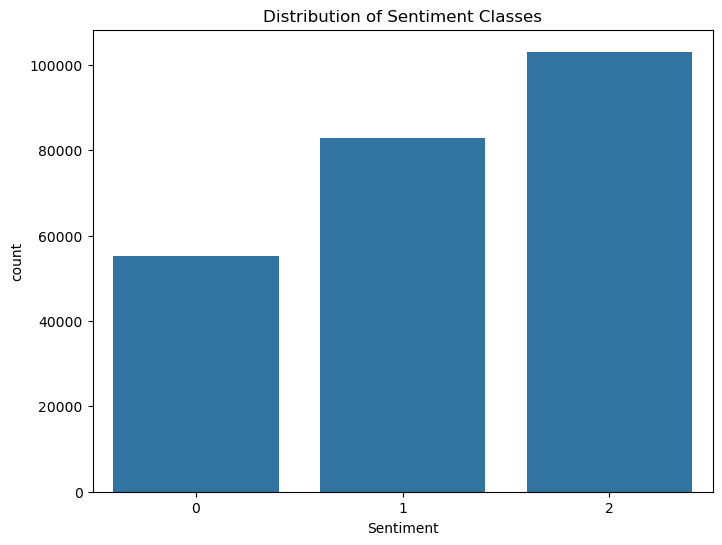

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Sentiment Classes')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

df['tokens_str'] = df['tokens'].apply(lambda x: " ".join(x))  # convert list of tokens back to string
vectorizer = CountVectorizer(max_features=10000) 
X = vectorizer.fit_transform(df['tokens_str'])
y = df['Sentiment'] # 0 for Negative , 1 for Neutral , 2 for Positive
print(X.shape)  

KeyError: 'tokens'

In [ ]:
# bulding the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200 , class_weight='balanced' , multi_class='multinomial')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
